# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aldian Prawira
- **Email:** aldianprawira99@gmail.com
- **ID Dicoding:** aldian_prawira

## Menentukan Pertanyaan Bisnis

1.	Bagaimana pola total rental dari bulan ke bulan?
2.	Bagaimana pengaruh musim terhadap total rental?
3.	Bagaimana pengaruh cuaca terhadap total rental?
4.	Bagaimana jumlah total rental per hari?
5.	Bagaimana pengaruh hari kerja dan hari libur terhadap total rental?
6.	Bagaimana korelasi total rental dengan temperature, apparent temperature, humidity, dan wind speed?
7.	Bagaimana pola total rental berdasarkan jam pada hari kerja dan bukan hari kerja?
8.	Bagaimana pengaruh musim terhadap total rental tiap jamnya?

## Import Semua Packages/Library yang Digunakan

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [76]:
df_Day = pd.read_csv("data/day.csv")
df_Day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [77]:
df_Hour = pd.read_csv("data/hour.csv")
df_Hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Penjelasan setiap kolom:
- instant: Record index
- dteday: Date
- season: Season (1: winter, 2: spring, 3: summer, 4: fall)
- yr: Year (0: 2011, 1: 2012)
- mnth: Month (1 to 12)
- hr: Hour of the day (0 to 23)
- holiday: Whether the day is a holiday (1: holiday, 0: not a holiday)
- weekday: Day of the week (0: Sunday, 1: Monday, ..., 6: Saturday)
- workingday: Whether the day is a working day (1: working day, 0: weekend/holiday)
- weathersit: Weather condition:
- 1: Clear, Few clouds, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds
- 3: Light Snow, Light Rain + Thunderstorm
- 4: Heavy Rain + Ice Pallets, Snow + Fog
- temp: Normalized temperature in Celsius (scaled between -8°C and 39°C)
- atemp: Normalized apparent (feels-like) temperature (scaled between -16°C and 50°C)
- hum: Normalized humidity (divided by 100)
- windspeed: Normalized wind speed (divided by 67)
- casual: Count of casual users (non-registered)
- registered: Count of registered users
- cnt: Total count of rentals (casual + registered)

### Assessing Data

#### df_Day

In [78]:
# Mendapatkan informasi tentang jumlah data total, nama kolom, jumlah data tidak null setiap kolom, dan tipe data
df_Day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [79]:
# Menghitung jumlah missing value dari setiap kolom
df_Day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [80]:
# Menghitung jumlah duplicate data
print("Jumlah duplikasi: ", df_Day.duplicated().sum())

Jumlah duplikasi:  0


In [81]:
# Mendapatkan informasi jumlah, mean, std, nilai minimum, median, dan nilai maksimum dari setiap kolom
df_Day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### df_Hour

In [82]:
# Mendapatkan informasi tentang jumlah data total, nama kolom, jumlah data tidak null setiap kolom, dan tipe data
df_Hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [83]:
# Menghitung jumlah missing value dari setiap kolom
df_Hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [84]:
# Menghitung jumlah duplicate data
print("Jumlah duplikasi: ", df_Hour.duplicated().sum())

Jumlah duplikasi:  0


In [85]:
# Mendapatkan informasi jumlah, mean, std, nilai minimum, median, dan nilai maksimum dari setiap kolom
df_Hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada dataset df_Day tidak ada missing value, duplicate data, dan outlier
- Pada dataset df_Hour tidak ada missing value, duplicate data, dan outlier

### Cleaning Data

#### df_Day

In [86]:
# Drop kolom instant (index) karena tidak diperlukan
# Drop kolom yr dan mnth karena sudah ada kolom dteday
df_Day = df_Day.drop(columns=["instant", "yr", "mnth"])
df_Day.head()

,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [87]:
# Mengganti value pada kolom season menjadi label
season_labels = {1: "winter", 2: "spring", 3: "summer", 4: "fall"}
df_Day["season"] = df_Day["season"].replace(season_labels)

# Mengganti value pada kolom weekday menjadi label
weekday_map = {
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
}
df_Day["weekday"] = df_Day["weekday"].map(weekday_map)

df_Day.head()

,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,winter,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,winter,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,winter,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,winter,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,winter,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### df_Hour

In [88]:
# Drop kolom instant (index) karena tidak diperlukan
# Drop kolom yr dan mnth karena sudah ada kolom dteday
df_Hour = df_Hour.drop(columns=["instant", "yr", "mnth"])
df_Hour.head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [89]:
# Mengganti value pada kolom season menjadi label
season_labels = {1: "winter", 2: "spring", 3: "summer", 4: "fall"}
df_Hour["season"] = df_Hour["season"].replace(season_labels)

# Mengganti value pada kolom weekday menjadi label
weekday_map = {
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
}
df_Hour["weekday"] = df_Hour["weekday"].map(weekday_map)

df_Hour.head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,winter,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,winter,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,winter,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,winter,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,winter,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Drop beberapa kolom yang tidak diperlukan
- Mengganti value pada kolom season menjadi label

## Exploratory Data Analysis (EDA)

### Memeriksa apakah df_Day adalah df_Hour yang dijumlahkan

In [90]:
df_daily_Hour = df_Hour.groupby("dteday")["cnt"].sum().reset_index()
df_merged = pd.merge(
    df_Day[["dteday", "cnt"]], df_daily_Hour, on="dteday", suffixes=("_Day", "_Hour")
)
cnt_match = (df_merged["cnt_Day"] == df_merged["cnt_Hour"]).all()
cnt_match

True

### Menampilkan total rental dari bulan ke bulan

In [91]:
df_Day["dteday"] = pd.to_datetime(df_Day["dteday"])
df_Day["year_month"] = df_Day["dteday"].dt.to_period("M")
monthly_rentals = (
    df_Day.groupby("year_month")[["casual", "registered", "cnt"]].sum().reset_index()
)
monthly_rentals["year_month"] = monthly_rentals["year_month"].dt.to_timestamp()
monthly_rentals

,year_month,casual,registered,cnt
0,2011-01-01,3073,35116,38189
1,2011-02-01,6242,41973,48215
2,2011-03-01,12826,51219,64045
3,2011-04-01,22346,72524,94870
4,2011-05-01,31050,104771,135821
5,2011-06-01,30612,112900,143512
6,2011-07-01,36452,104889,141341
7,2011-08-01,28842,107849,136691
8,2011-09-01,26545,100873,127418
9,2011-10-01,25222,98289,123511


### Menampilkan total rental untuk setiap musim

In [92]:
season_order = ["spring", "summer", "fall", "winter"]
df_Day["season"] = pd.Categorical(
    df_Day["season"], categories=season_order, ordered=True
)
seasonal_rentals = df_Day.groupby("season")[["cnt"]].sum().reset_index()
seasonal_rentals

C:\Users\Aldian Prawira\AppData\Local\Temp\ipykernel_3220\536021303.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rentals = df_Day.groupby("season")[["cnt"]].sum().reset_index()


,season,cnt
0,spring,918589
1,summer,1061129
2,fall,841613
3,winter,471348


### Menampilkan total rental untuk setiap cuaca

In [93]:
weather_data = df_Day.groupby("weathersit")["cnt"].sum().reset_index()
weather_data

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


### Menampilkan total rental per hari

In [94]:
weekly_rentals = df_Day.groupby("weekday")["cnt"].sum().reset_index()
weekly_rentals

,weekday,cnt
0,Friday,487790
1,Monday,455503
2,Saturday,477807
3,Sunday,444027
4,Thursday,485395
5,Tuesday,469109
6,Wednesday,473048


### Menampilkan total rental saat holiday dan working day

In [95]:
day_type_df = df_Day.copy()

day_type_df["day_type"] = day_type_df.apply(
    lambda row: (
        "Holiday & Non-Working Day"
        if row["holiday"] == 1 and row["workingday"] == 0
        else (
            "Holiday & Working Day"
            if row["holiday"] == 1 and row["workingday"] == 1
            else (
                "Non-Holiday & Working Day"
                if row["holiday"] == 0 and row["workingday"] == 1
                else "Non-Holiday & Non-Working Day"
            )
        )
    ),
    axis=1,
)

day_type_data = day_type_df.groupby("day_type")["cnt"].sum().reset_index()
day_type_data.rename(columns={"cnt": "Total Rentals"}, inplace=True)
day_type_data

,day_type,Total Rentals
0,Holiday & Non-Working Day,78435
1,Non-Holiday & Non-Working Day,921834
2,Non-Holiday & Working Day,2292410


### Menampilkan korelasi total rental dengan temperature, apparent temperature, humidity, dan wind speed

In [96]:
# Korelasi total rental dengan temperature
correlation = df_Day[["temp", "cnt"]].corr().iloc[0, 1]
print(
    f"Correlation between Normalized Temperature and Total Rentals: {correlation:.4f}"
)

# Korelasi total rental dengan apparent temperature
correlation_atemp = df_Day[["atemp", "cnt"]].corr().iloc[0, 1]
print(
    f"Correlation between Normalized Apparent Temperature and Total Rentals: {correlation_atemp:.4f}"
)

# Korelasi total rental dengan humidity
correlation_hum = df_Day[["hum", "cnt"]].corr().iloc[0, 1]
print(
    f"Correlation between Normalized Humidity and Total Rentals: {correlation_hum:.4f}"
)

# Korelasi total rental dengan wind speed
correlation_windspeed = df_Day[["windspeed", "cnt"]].corr().iloc[0, 1]
print(
    f"Correlation between Normalized Wind Speed and Total Rentals: {correlation_windspeed:.4f}"
)

Correlation between Normalized Temperature and Total Rentals: 0.6275
Correlation between Normalized Apparent Temperature and Total Rentals: 0.6311
Correlation between Normalized Humidity and Total Rentals: -0.1007
Correlation between Normalized Wind Speed and Total Rentals: -0.2345


### Menampilkan total rental tiap jam pada hari kerja

In [97]:
working_day_data = df_Hour[df_Hour["workingday"] == 1]
hourly_rentals_working_day = working_day_data.groupby("hr")["cnt"].sum().reset_index()
hourly_rentals_working_day

,hr,cnt
0,0,18246
1,1,8177
2,2,4229
3,3,2323
4,4,2552
5,5,12332
6,6,50840
7,7,144144
8,8,236595
9,9,119793


### Menampilkan total rental tiap jam bukan hari kerja

In [98]:
non_working_day_data = df_Hour[df_Hour["workingday"] == 0]
hourly_rentals_non_working_day = (
    non_working_day_data.groupby("hr")["cnt"].sum().reset_index()
)
print(hourly_rentals_non_working_day)

    hr    cnt
0    0  20884
1    1  15987
2    2  12123
3    3   5851
4    4   1876
5    5   1929
6    6   4292
7    7  10027
8    8  24406
9    9  39645
10  10  59115
11  11  72838
12  12  84606
13  13  86101
14  14  84233
15  15  82886
16  16  81480
17  17  74740
18  18  64643
19  19  53285
20  20  40190
21  21  32674
22  22  26694
23  23  19764


### Menampilkan total rental tiap jam setiap musim

In [99]:
winter_data = df_Hour[df_Hour["season"] == "winter"]
spring_data = df_Hour[df_Hour["season"] == "spring"]
summer_data = df_Hour[df_Hour["season"] == "summer"]
fall_data = df_Hour[df_Hour["season"] == "fall"]

hourly_rentals_winter = winter_data.groupby("hr")["cnt"].sum().reset_index()
hourly_rentals_spring = spring_data.groupby("hr")["cnt"].sum().reset_index()
hourly_rentals_summer = summer_data.groupby("hr")["cnt"].sum().reset_index()
hourly_rentals_fall = fall_data.groupby("hr")["cnt"].sum().reset_index()

hourly_rentals_winter["season"] = "Winter"
hourly_rentals_spring["season"] = "Spring"
hourly_rentals_summer["season"] = "Summer"
hourly_rentals_fall["season"] = "Fall"

combined_hourly_rentals = pd.concat(
    [
        hourly_rentals_winter,
        hourly_rentals_spring,
        hourly_rentals_summer,
        hourly_rentals_fall,
    ]
)

pivot_table = combined_hourly_rentals.pivot(index="hr", columns="season", values="cnt")
pivot_table

season,Fall,Spring,Summer,Winter
hr,,,,
0,9971,10459,13822,4878
1,6322,6481,8132,3229
2,4159,4302,5716,2175
3,2052,2084,2930,1108
4,1279,1118,1541,490
5,3976,3508,4947,1830
6,14376,14549,18946,7261
7,40763,40753,52000,20655
8,69757,69945,79204,42095


**Insight:**
- df_Day adalah df_Hour yang dijumlahkan
- Mengetahui total rental dari bulan ke bulan
- Mengetahui total rental untuk setiap musim
- Mengetahui total rental untuk setiap cuaca
- Mengetahui total rental per hari
- Mengetahui total rental saat holiday dan working day
- Mengetahui korelasi total rental dengan temperature, apparent temperature, humidity, dan wind speed
- Mengetahui total rental tiap jam pada hari kerja dan bukan hari kerja
- Mengetahui total rental tiap jam setiap musim

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola total rental dari bulan ke bulan?

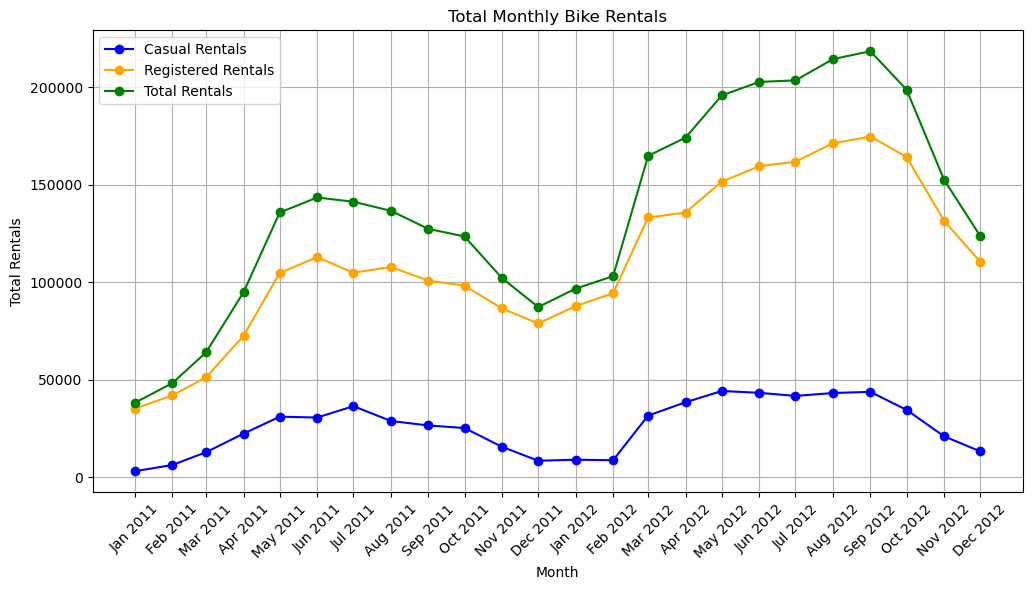

In [100]:
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_rentals["year_month"],
    monthly_rentals["casual"],
    marker="o",
    label="Casual Rentals",
    color="blue",
)
plt.plot(
    monthly_rentals["year_month"],
    monthly_rentals["registered"],
    marker="o",
    label="Registered Rentals",
    color="orange",
)
plt.plot(
    monthly_rentals["year_month"],
    monthly_rentals["cnt"],
    marker="o",
    label="Total Rentals",
    color="green",
)

plt.title("Total Monthly Bike Rentals")
plt.xlabel("Month")
plt.ylabel("Total Rentals")

plt.xticks(
    monthly_rentals["year_month"],
    monthly_rentals["year_month"].dt.strftime("%b %Y"),
    rotation=45,
)

plt.legend()
plt.grid()
plt.show()

**Insight:**
- Pola total rental untuk setiap tahunnya cenderung sama, yaitu naik saat awal tahun dan turun saat akhir tahun.
- Pada tahun 2011 kenaikan total rental yang signifikan terjadi di bulan Maret hingga Mei, lalu setelah itu mulai turun perlahan menuju akhir tahun.
- Pada tahun 2012 kenaikan total rental yang signifikan terjadi di bulan Februari hingga Mei, lalu stabil di bulan Mei hingga September, kemudian turun secara drastis menuju akhir tahun.
- Total rental terbanyak terjadi di bulan September tahun 2012.
- Pola total rental, casual rental, dan registered rental cenderung sama.

### Pertanyaan 2: Bagaimana pengaruh musim terhadap total rental?

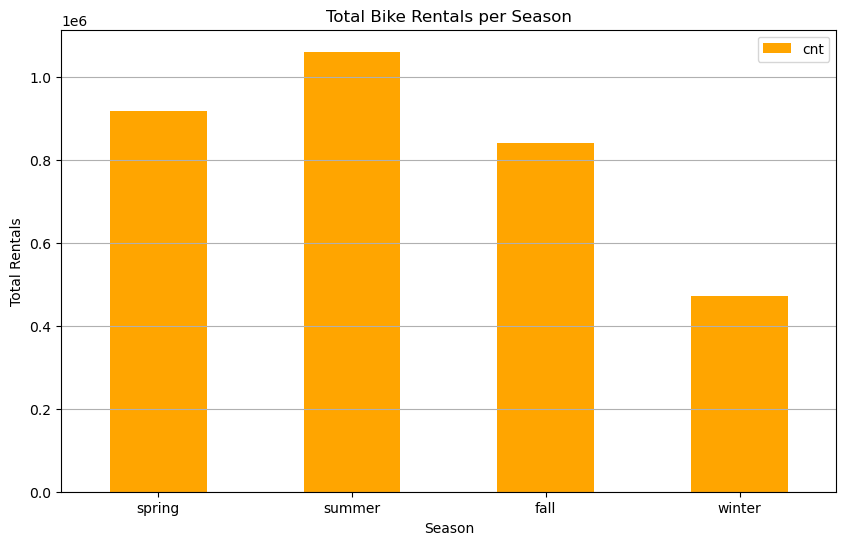

In [101]:
seasonal_rentals.set_index("season").plot(kind="bar", color="orange", figsize=(10, 6))

plt.title("Total Bike Rentals per Season")
plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.xticks(rotation=0)
plt.grid(axis="y")

plt.show()

**Insight:**
- Musim mempengaruhi total rental.
- Total rental terbanyak terjadi di musim panas (summer).
- Total rental tersedikit terjadi di musim dingin (winter).

### Pertanyaan 3: Bagaimana pengaruh cuaca terhadap total rental?

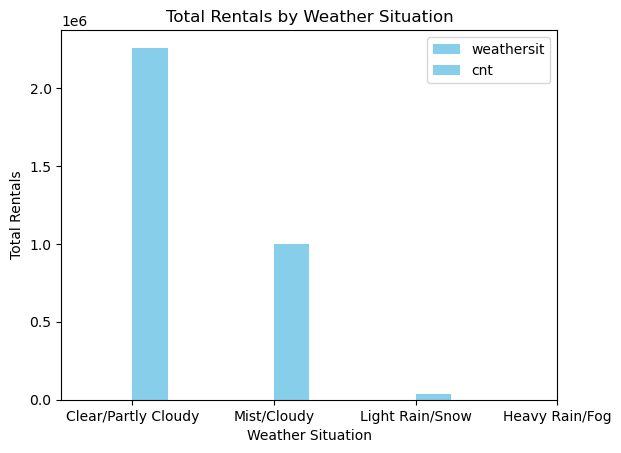

In [102]:
weather_data.plot(
    kind="bar",
    color="skyblue",
    title="Total Rentals by Weather Situation",
    xlabel="Weather Situation",
    ylabel="Total Rentals",
    rot=0,
)

plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=["Clear/Partly Cloudy", "Mist/Cloudy", "Light Rain/Snow", "Heavy Rain/Fog"],
    rotation=0,
)

plt.show()

**Insight:**
- Cuaca mempengaruhi total rental.
- Sebagian besar orang memilih rental sepeda pada cuaca cerah (clear/partly cloudy) dan berawan (mist/cloudy).
- Ada sedikit orang yang merental sepeda pada cuaca hujan ringan (light rain/snow).
- Tidak ada orang yang merental sepeda pada cuaca hujan lebat (heavy rain/fog).

### Pertanyaan 4: Bagaimana jumlah total rental per hari?

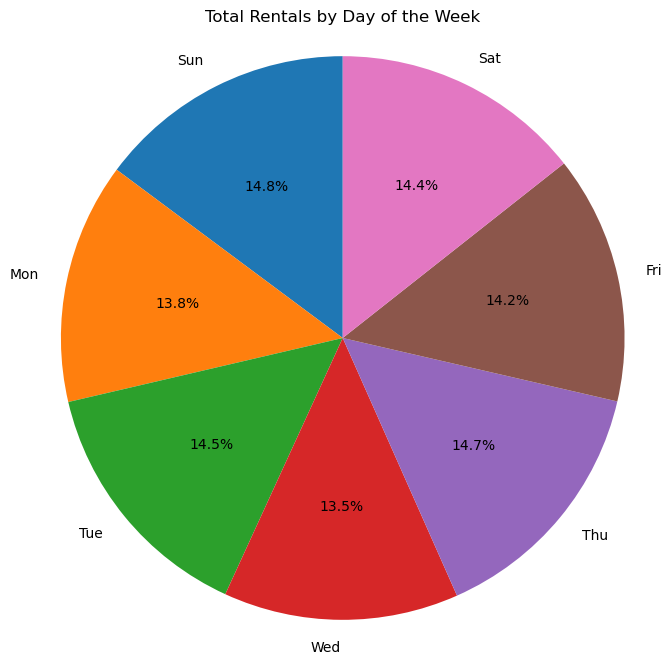

In [103]:
labels = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]

plt.figure(figsize=(8, 8))
plt.pie(weekly_rentals["cnt"], labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Total Rentals by Day of the Week")
plt.axis("equal")
plt.show()

**Insight:**
- Hari tidak terlalu mempengaruhi jumlah rental.

### Pertanyaan 5: Bagaimana pengaruh hari kerja dan hari libur terhadap total rental?

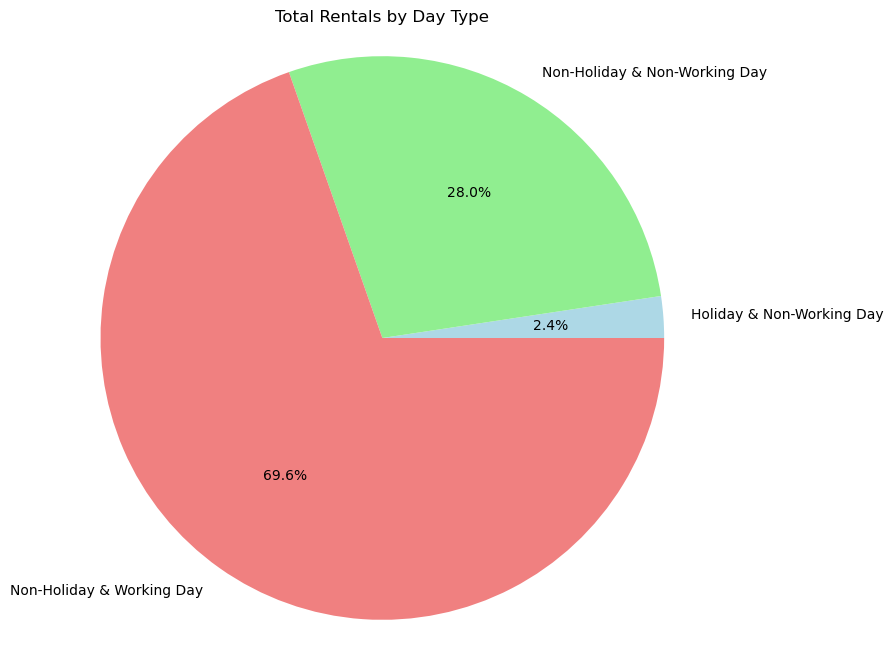

In [104]:
day_type_data.set_index("day_type").plot.pie(
    y="Total Rentals",
    autopct="%1.1f%%",
    colors=["lightblue", "lightgreen", "lightcoral", "lightyellow"],
    title="Total Rentals by Day Type",
    figsize=(8, 8),
    legend=False,
)
plt.ylabel("")
plt.axis("equal")
plt.show()

**Insight:**
- Sebagian besar orang (69.6%) merental sepeda di hari kerja.
- 28% orang merental sepeda saat bukan hari kerja, tetapi bukan hari libur.
- 2.4% orang merental sepeda saat hari libur.

### Pertanyaan 6: Bagaimana korelasi total rental dengan temperature, apparent temperature, humidity, dan wind speed?

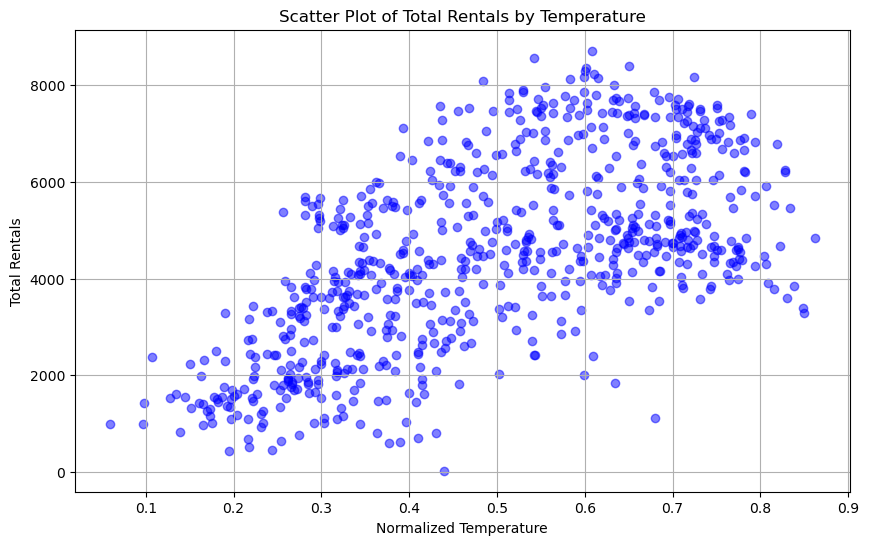

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(df_Day["temp"], df_Day["cnt"], color="blue", alpha=0.5)

plt.title("Scatter Plot of Total Rentals by Temperature")
plt.xlabel("Normalized Temperature")
plt.ylabel("Total Rentals")

plt.grid(True)
plt.show()

**Insight:**
- Terdapat korelasi positif yang kecil antara total rental dengan temperature.

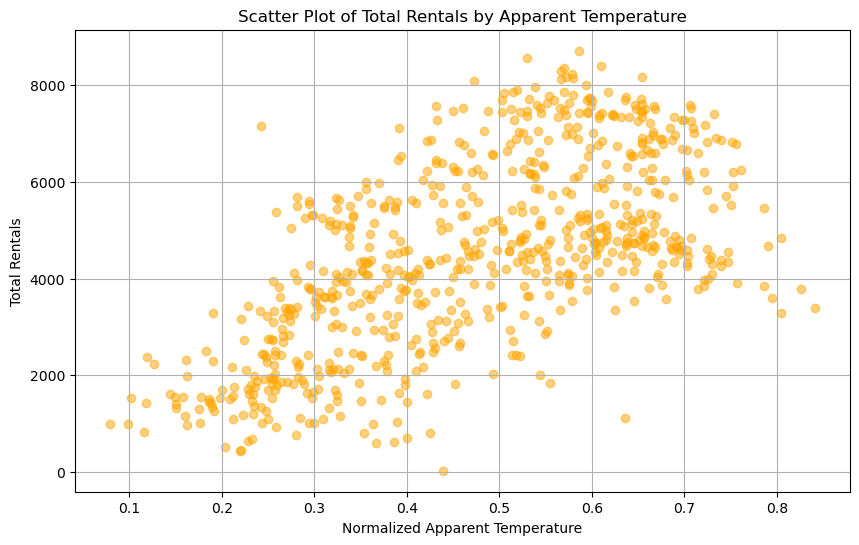

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(df_Day["atemp"], df_Day["cnt"], color="orange", alpha=0.5)

plt.title("Scatter Plot of Total Rentals by Apparent Temperature")
plt.xlabel("Normalized Apparent Temperature")
plt.ylabel("Total Rentals")

plt.grid(True)
plt.show()

**Insight:**
- Terdapat korelasi positif yang kecil antara total rental dengan apparent temperature

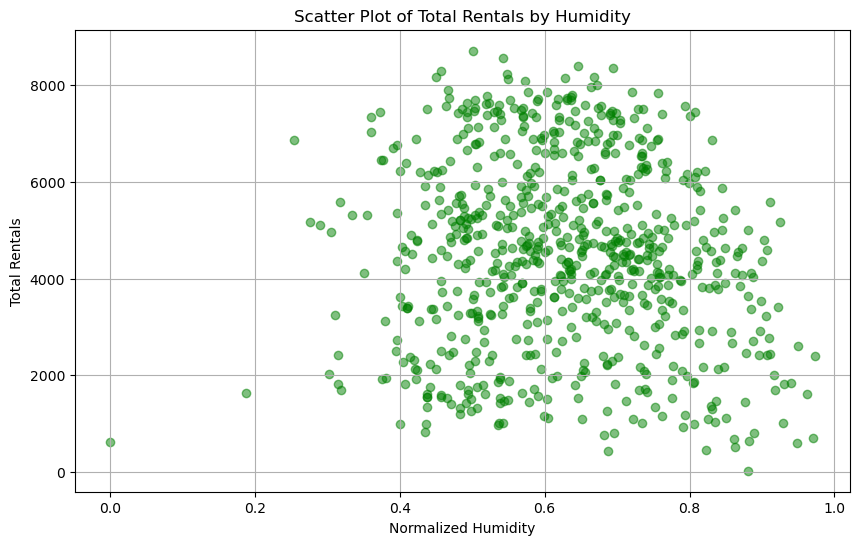

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(df_Day["hum"], df_Day["cnt"], color="green", alpha=0.5)

plt.title("Scatter Plot of Total Rentals by Humidity")
plt.xlabel("Normalized Humidity")
plt.ylabel("Total Rentals")

plt.grid(True)
plt.show()

**Insight:**
- Total rental tidak dipengaruhi oleh kelembapan (humidity).

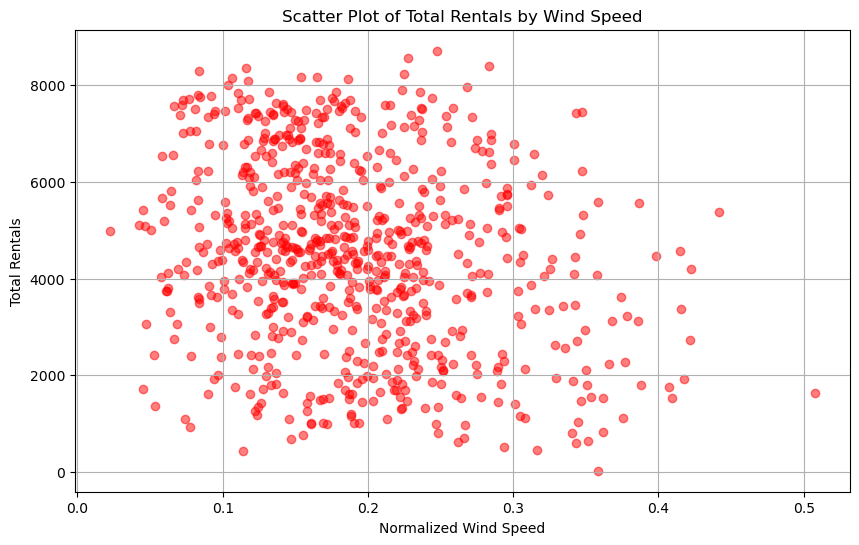

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(df_Day["windspeed"], df_Day["cnt"], color="red", alpha=0.5)

plt.title("Scatter Plot of Total Rentals by Wind Speed")
plt.xlabel("Normalized Wind Speed")
plt.ylabel("Total Rentals")

plt.grid(True)
plt.show()

**Insight:**
- Total rental tidak dipengaruhi oleh kecepatan angin (wind speed).

### Pertanyaan 7: Bagaimana pola total rental berdasarkan jam pada hari kerja dan bukan hari kerja?

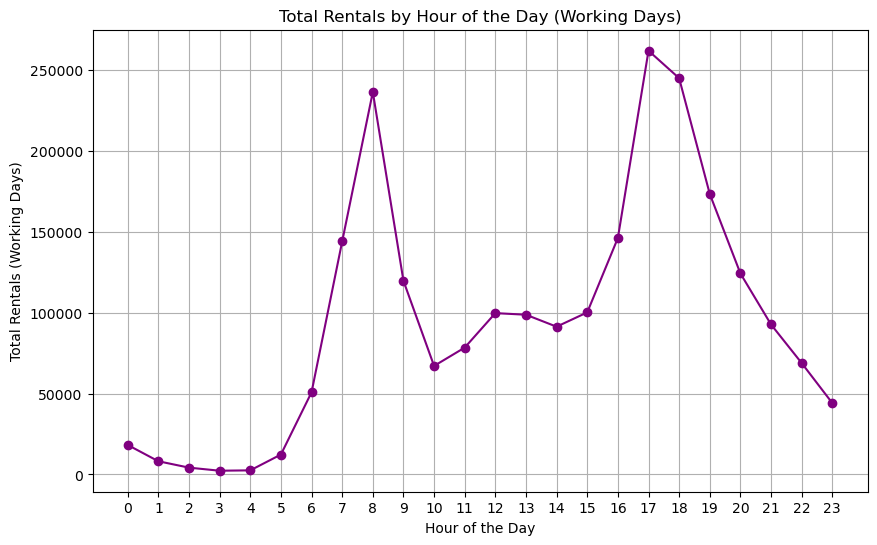

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(
    hourly_rentals_working_day["hr"],
    hourly_rentals_working_day["cnt"],
    marker="o",
    color="purple",
)

plt.title("Total Rentals by Hour of the Day (Working Days)")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Rentals (Working Days)")
plt.xticks(hourly_rentals_working_day["hr"])
plt.grid(True)

plt.show()

**Insight:**
- Pada hari kerja, orang cenderung merental sepeda pada pagi hari dan sore hari.
- Pada pagi hari, orang mulai merental dari jam 5:00 hingga puncaknya di jam 8:00.
- Pada sore hari, orang mulai merental dari jam 15:00 hingga puncaknya di jam 17:00.

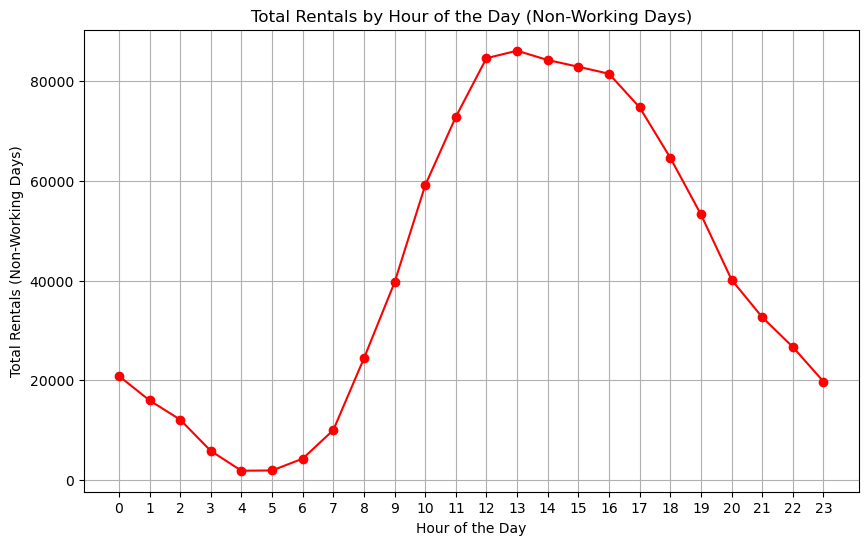

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(
    hourly_rentals_non_working_day["hr"],
    hourly_rentals_non_working_day["cnt"],
    marker="o",
    color="red",
)

plt.title("Total Rentals by Hour of the Day (Non-Working Days)")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Rentals (Non-Working Days)")
plt.xticks(hourly_rentals_non_working_day["hr"])
plt.grid(True)

plt.show()

**Insight:**
- Di hari bukan hari kerja, orang mulai merental dari pagi jam 6:00 hingga puncaknya di jam 12:00 sampai 16:00, lalu turun setelah itu.

### Pertanyaan 8: Bagaimana pengaruh musim terhadap total rental tiap jamnya?

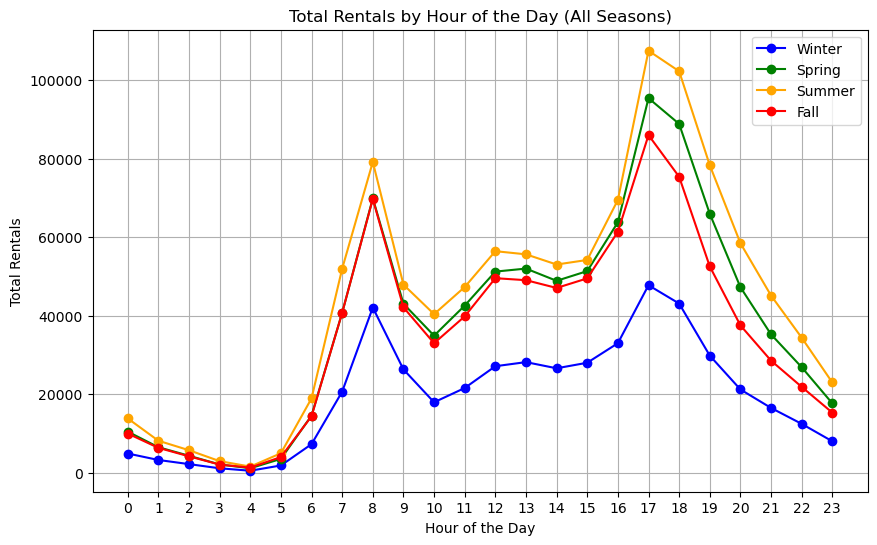

In [111]:
plt.figure(figsize=(10, 6))

plt.plot(
    hourly_rentals_winter["hr"],
    hourly_rentals_winter["cnt"],
    marker="o",
    color="blue",
    label="Winter",
)
plt.plot(
    hourly_rentals_spring["hr"],
    hourly_rentals_spring["cnt"],
    marker="o",
    color="green",
    label="Spring",
)
plt.plot(
    hourly_rentals_summer["hr"],
    hourly_rentals_summer["cnt"],
    marker="o",
    color="orange",
    label="Summer",
)
plt.plot(
    hourly_rentals_fall["hr"],
    hourly_rentals_fall["cnt"],
    marker="o",
    color="red",
    label="Fall",
)

# Set titles and labels
plt.title("Total Rentals by Hour of the Day (All Seasons)")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Rentals")
plt.xticks(hourly_rentals_winter["hr"])
plt.grid(True)

plt.legend()
plt.show()

**Insight:**
- Pola total rental tiap jam untuk semua musim cenderung sama.
- Sama seperti visualisasi total rental setiap musim, untuk total rental paling banyak terjadi di musim panas (summer) dan paling sedikit terjadi di musim dingin (winter).

## Conclusion

- Pola total rental untuk setiap tahunnya cenderung sama, yaitu naik saat awal tahun dan turun saat akhir tahun.
- Pada tahun 2011 kenaikan total rental yang signifikan terjadi di bulan Maret hingga Mei, lalu setelah itu mulai turun perlahan menuju akhir tahun.
- Pada tahun 2012 kenaikan total rental yang signifikan terjadi di bulan Februari hingga Mei, lalu stabil di bulan Mei hingga September, kemudian turun secara drastis menuju akhir tahun.
- Total rental terbanyak terjadi di bulan September tahun 2012.
- Pola total rental, casual rental, dan registered rental cenderung sama.
- Musim mempengaruhi total rental.
- Total rental terbanyak terjadi di musim panas (summer).
- Total rental tersedikit terjadi di musim dingin (winter).
- Cuaca mempengaruhi total rental.
- Sebagian besar orang memilih rental sepeda pada cuaca cerah (clear/partly cloudy) dan berawan (mist/cloudy).
- Ada sedikit orang yang merental sepeda pada cuaca hujan ringan (light rain/snow).
- Tidak ada orang yang merental sepeda pada cuaca hujan lebat (heavy rain/fog).
- Hari tidak terlalu mempengaruhi jumlah rental.
- Sebagian besar orang (69.6%) merental sepeda di hari kerja.
- 28% orang merental sepeda saat bukan hari kerja, tetapi bukan hari libur.
- 2.4% orang merental sepeda saat hari libur.
- Terdapat korelasi positif yang kecil antara total rental dengan temperature.
- Terdapat korelasi positif yang kecil antara total rental dengan apparent temperature
- Total rental tidak dipengaruhi oleh kelembapan (humidity).
- Total rental tidak dipengaruhi oleh kecepatan angin (wind speed).
- Pada hari kerja, orang cenderung merental sepeda pada pagi hari dan sore hari.
- Pada pagi hari, orang mulai merental dari jam 5:00 hingga puncaknya di jam 8:00.
- Pada sore hari, orang mulai merental dari jam 15:00 hingga puncaknya di jam 17:00.
- Di hari bukan hari kerja, orang mulai merental dari pagi jam 6:00 hingga puncaknya di jam 12:00 sampai 16:00, lalu turun setelah itu.
- Pola total rental tiap jam untuk semua musim cenderung sama.
- Sama seperti visualisasi total rental setiap musim, untuk total rental paling banyak terjadi di musim panas (summer) dan paling sedikit terjadi di musim dingin (winter).